In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf


In [2]:
'''
 model for cluster 1 (Ampara ,Batticaloa ,Monaragala)
'''


df1 = pd.read_csv("/content/drive/MyDrive/FYP/data set/Ampara.csv",parse_dates=['timestamp_index'],index_col='timestamp_index')
df1=df1.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)


df2 = pd.read_csv('/content/drive/MyDrive/FYP/data set/Batticaloa.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
df2=df2.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

df3 = pd.read_csv('/content/drive/MyDrive/FYP/data set/Monaragala.csv',parse_dates=['timestamp_index'],index_col='timestamp_index')
df3=df3.drop(['PM1.0 (ug/m3)', 'PM4.0 (ug/m3)', 'PM10.0 (ug/m3)','PM Sensor Status','Device Status'],axis=1)

In [3]:
df_list=[df1,df3,df2]
df=pd.concat(df_list)
#df = df.sort_index()
#df = df.groupby('timestamp_index').mean()
df

,PM2.5 (ug/m3),Temperature (Celsius),Relative Humidity (%),hour,day,dayofweek,month
timestamp_index,,,,,,,
2023-05-12 00:00:00,2.25,32.58,65.75,0.0,12.0,4.0,5.0
2023-05-12 01:00:00,2.00,32.17,66.50,1.0,12.0,4.0,5.0
2023-05-12 02:00:00,2.00,31.72,67.00,2.0,12.0,4.0,5.0
2023-05-12 03:00:00,2.50,31.50,67.50,3.0,12.0,4.0,5.0
2023-05-12 04:00:00,4.75,31.22,68.75,4.0,12.0,4.0,5.0
...,...,...,...,...,...,...,...
2023-12-20 08:00:00,3.00,31.28,71.75,8.0,20.0,2.0,12.0
2023-12-20 09:00:00,4.00,32.02,71.25,9.0,20.0,2.0,12.0
2023-12-20 10:00:00,5.00,31.00,74.75,10.0,20.0,2.0,12.0


In [4]:
'''Splitting the data to training and testing'''


n=len(df)
train=df.iloc[:int(n*0.7)]
validation=df.iloc[int(n*0.7):int(n*0.85)]
test=df.iloc[int(n*0.85):]

print(train)
#print(train.head(5),validation.head(5))



                     PM2.5 (ug/m3)  Temperature (Celsius)  \
timestamp_index                                             
2023-05-12 00:00:00           2.25                  32.58   
2023-05-12 01:00:00           2.00                  32.17   
2023-05-12 02:00:00           2.00                  31.72   
2023-05-12 03:00:00           2.50                  31.50   
2023-05-12 04:00:00           4.75                  31.22   
...                            ...                    ...   
2023-06-02 17:00:00          12.25                  37.40   
2023-06-02 18:00:00          17.75                  37.08   
2023-06-02 19:00:00          15.75                  36.98   
2023-06-02 20:00:00           8.75                  36.78   
2023-06-02 21:00:00          14.25                  36.55   

                     Relative Humidity (%)  hour   day  dayofweek  month  
timestamp_index                                                           
2023-05-12 00:00:00                  65.75   0.0  12.0  

In [5]:
scaler_train=MinMaxScaler()
scaler_validation=MinMaxScaler()
scaler_test=MinMaxScaler()

train_scaled=scaler_train.fit_transform(train)
validation_scaled=scaler_validation.fit_transform(validation)
test_scaled=scaler_test.fit_transform(test)
#features=train_scaled
#target=train_scaled[:,0]

#print(features)
#print(target)

In [6]:
x_train,y_train,x_validation,y_validation=train_scaled,train_scaled[:,0],validation_scaled,validation_scaled[:,0]
x_test,y_test=test_scaled,test_scaled[:,0]
'''
print('x_train=',x_train)
print('y_train=',y_train)
'''

"\nprint('x_train=',x_train)\nprint('y_train=',y_train)\n"

In [9]:
'''Defining the time series generator that going to feed into the model'''

win_length=18
batch_size=32
num_features=7
train_generator=TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
validation_generator=TimeseriesGenerator(x_validation,y_validation,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)
train_generator[0]

(array([[[0.03629032, 0.33364098, 0.70454545, ..., 0.36666667,
          0.66666667, 0.        ],
         [0.03225806, 0.31472081, 0.71818182, ..., 0.36666667,
          0.66666667, 0.        ],
         [0.03225806, 0.29395478, 0.72727273, ..., 0.36666667,
          0.66666667, 0.        ],
         ...,
         [0.06854839, 0.6723581 , 0.40909091, ..., 0.36666667,
          0.66666667, 0.        ],
         [0.06048387, 0.61236733, 0.44545455, ..., 0.36666667,
          0.66666667, 0.        ],
         [0.09274194, 0.5560683 , 0.51818182, ..., 0.36666667,
          0.66666667, 0.        ]],
 
        [[0.03225806, 0.31472081, 0.71818182, ..., 0.36666667,
          0.66666667, 0.        ],
         [0.03225806, 0.29395478, 0.72727273, ..., 0.36666667,
          0.66666667, 0.        ],
         [0.04032258, 0.28380249, 0.73636364, ..., 0.36666667,
          0.66666667, 0.        ],
         ...,
         [0.06048387, 0.61236733, 0.44545455, ..., 0.36666667,
          0.66666667, 0.

In [10]:
'''Defining the model architecture'''
''''
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(200,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))#to ensure the model is not overfitting the training data
model.add(tf.keras.layers.LSTM(100, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(100, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))
'''
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(200,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(100, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(100, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))


print(model.summary())

model.compile(loss=tf.losses.MeanSquaredError(),
optimizer=tf.optimizers.Adam(),
    metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit(train_generator, epochs=20,validation_data=validation_generator,shuffle=False)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 18, 200)           166400    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 18, 200)           0         
                                                                 
 lstm_4 (LSTM)               (None, 18, 100)           120400    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 18, 100)           0         
                                                                 
 dropout_2 (Dropout)         (None, 18, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)              

In [11]:
model.evaluate(test_generator,verbose=0)
predictions=model.predict(test_generator)

75/75 [==============================] - 3s 27ms/step


In [12]:
print(predictions.shape)
print(len(x_test))

(2390, 1)
2408


In [13]:
df_pred_scaled=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)
df_pred_scaled

,0,0,1,2,3,4,5
0,0.075428,0.468571,0.228916,1.000000,0.333333,0.000000,0.0
1,0.076040,0.425397,0.289157,0.000000,0.366667,0.166667,0.0
2,0.111438,0.405079,0.331325,0.043478,0.366667,0.166667,0.0
3,0.120378,0.379048,0.325301,0.086957,0.366667,0.166667,0.0
4,0.119768,0.375873,0.337349,0.130435,0.366667,0.166667,0.0
...,...,...,...,...,...,...,...
2385,0.070941,0.163810,0.801205,0.347826,0.633333,0.333333,1.0
2386,0.052287,0.210794,0.789157,0.391304,0.633333,0.333333,1.0
2387,0.062494,0.146032,0.873494,0.434783,0.633333,0.333333,1.0
2388,0.078317,0.292063,0.777108,0.478261,0.633333,0.333333,1.0


In [14]:
#df_pred=scaler_train.inverse_transform(df_pred_scaled)
df_pred_scaled.shape
print(scaler_train.feature_names_in_)
print(scaler_train.data_max_)

['PM2.5 (ug/m3)' 'Temperature (Celsius)' 'Relative Humidity (%)' 'hour'
 'day' 'dayofweek' 'month']
[62.   47.02 82.   23.   31.    6.   12.  ]


In [15]:
df_pred=scaler_train.inverse_transform(df_pred_scaled)
df_pred

array([[ 4.67654903, 35.50394286, 39.59036145, ..., 11.        ,
         0.        ,  5.        ],
       [ 4.71450262, 34.56834921, 42.90361446, ..., 12.        ,
         1.        ,  5.        ],
       [ 6.9091707 , 34.12806984, 45.22289157, ..., 12.        ,
         1.        ,  5.        ],
       ...,
       [ 3.87460066, 28.51450794, 75.04216867, ..., 20.        ,
         2.        , 12.        ],
       [ 4.85562545, 31.67901587, 69.74096386, ..., 20.        ,
         2.        , 12.        ],
       [ 3.85284185, 32.09177778, 67.75301205, ..., 20.        ,
         2.        , 12.        ]])

In [ ]:
'''df_pred_scaled_2=pd.concat([pd.DataFrame(y_test[win_length:]),pd.DataFrame(x_test[win_length:])],axis=1)
df_pred_2=scaler_test.inverse_transform(df_pred_scaled_2)
df_pred_2'''

In [16]:
df_final=df[predictions.shape[0]*-1:]


df_final

,PM2.5 (ug/m3),Temperature (Celsius),Relative Humidity (%),hour,day,dayofweek,month
timestamp_index,,,,,,,
2023-09-11 23:00:00,4.00,36.08,48.00,23.0,11.0,0.0,9.0
2023-09-12 00:00:00,7.00,35.40,50.50,0.0,12.0,1.0,9.0
2023-09-12 01:00:00,7.25,35.08,52.25,1.0,12.0,1.0,9.0
2023-09-12 02:00:00,7.00,34.67,52.00,2.0,12.0,1.0,9.0
2023-09-12 03:00:00,7.75,34.62,52.50,3.0,12.0,1.0,9.0
...,...,...,...,...,...,...,...
2023-12-20 08:00:00,3.00,31.28,71.75,8.0,20.0,2.0,12.0
2023-12-20 09:00:00,4.00,32.02,71.25,9.0,20.0,2.0,12.0
2023-12-20 10:00:00,5.00,31.00,74.75,10.0,20.0,2.0,12.0


In [17]:
df_final['PM2.5_predicted']=df_pred[:,0]
df_final

<ipython-input-17-938c8907a555>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['PM2.5_predicted']=df_pred[:,0]


,PM2.5 (ug/m3),Temperature (Celsius),Relative Humidity (%),hour,day,dayofweek,month,PM2.5_predicted
timestamp_index,,,,,,,,
2023-09-11 23:00:00,4.00,36.08,48.00,23.0,11.0,0.0,9.0,4.676549
2023-09-12 00:00:00,7.00,35.40,50.50,0.0,12.0,1.0,9.0,4.714503
2023-09-12 01:00:00,7.25,35.08,52.25,1.0,12.0,1.0,9.0,6.909171
2023-09-12 02:00:00,7.00,34.67,52.00,2.0,12.0,1.0,9.0,7.463464
2023-09-12 03:00:00,7.75,34.62,52.50,3.0,12.0,1.0,9.0,7.425594
...,...,...,...,...,...,...,...,...
2023-12-20 08:00:00,3.00,31.28,71.75,8.0,20.0,2.0,12.0,4.398313
2023-12-20 09:00:00,4.00,32.02,71.25,9.0,20.0,2.0,12.0,3.241822
2023-12-20 10:00:00,5.00,31.00,74.75,10.0,20.0,2.0,12.0,3.874601


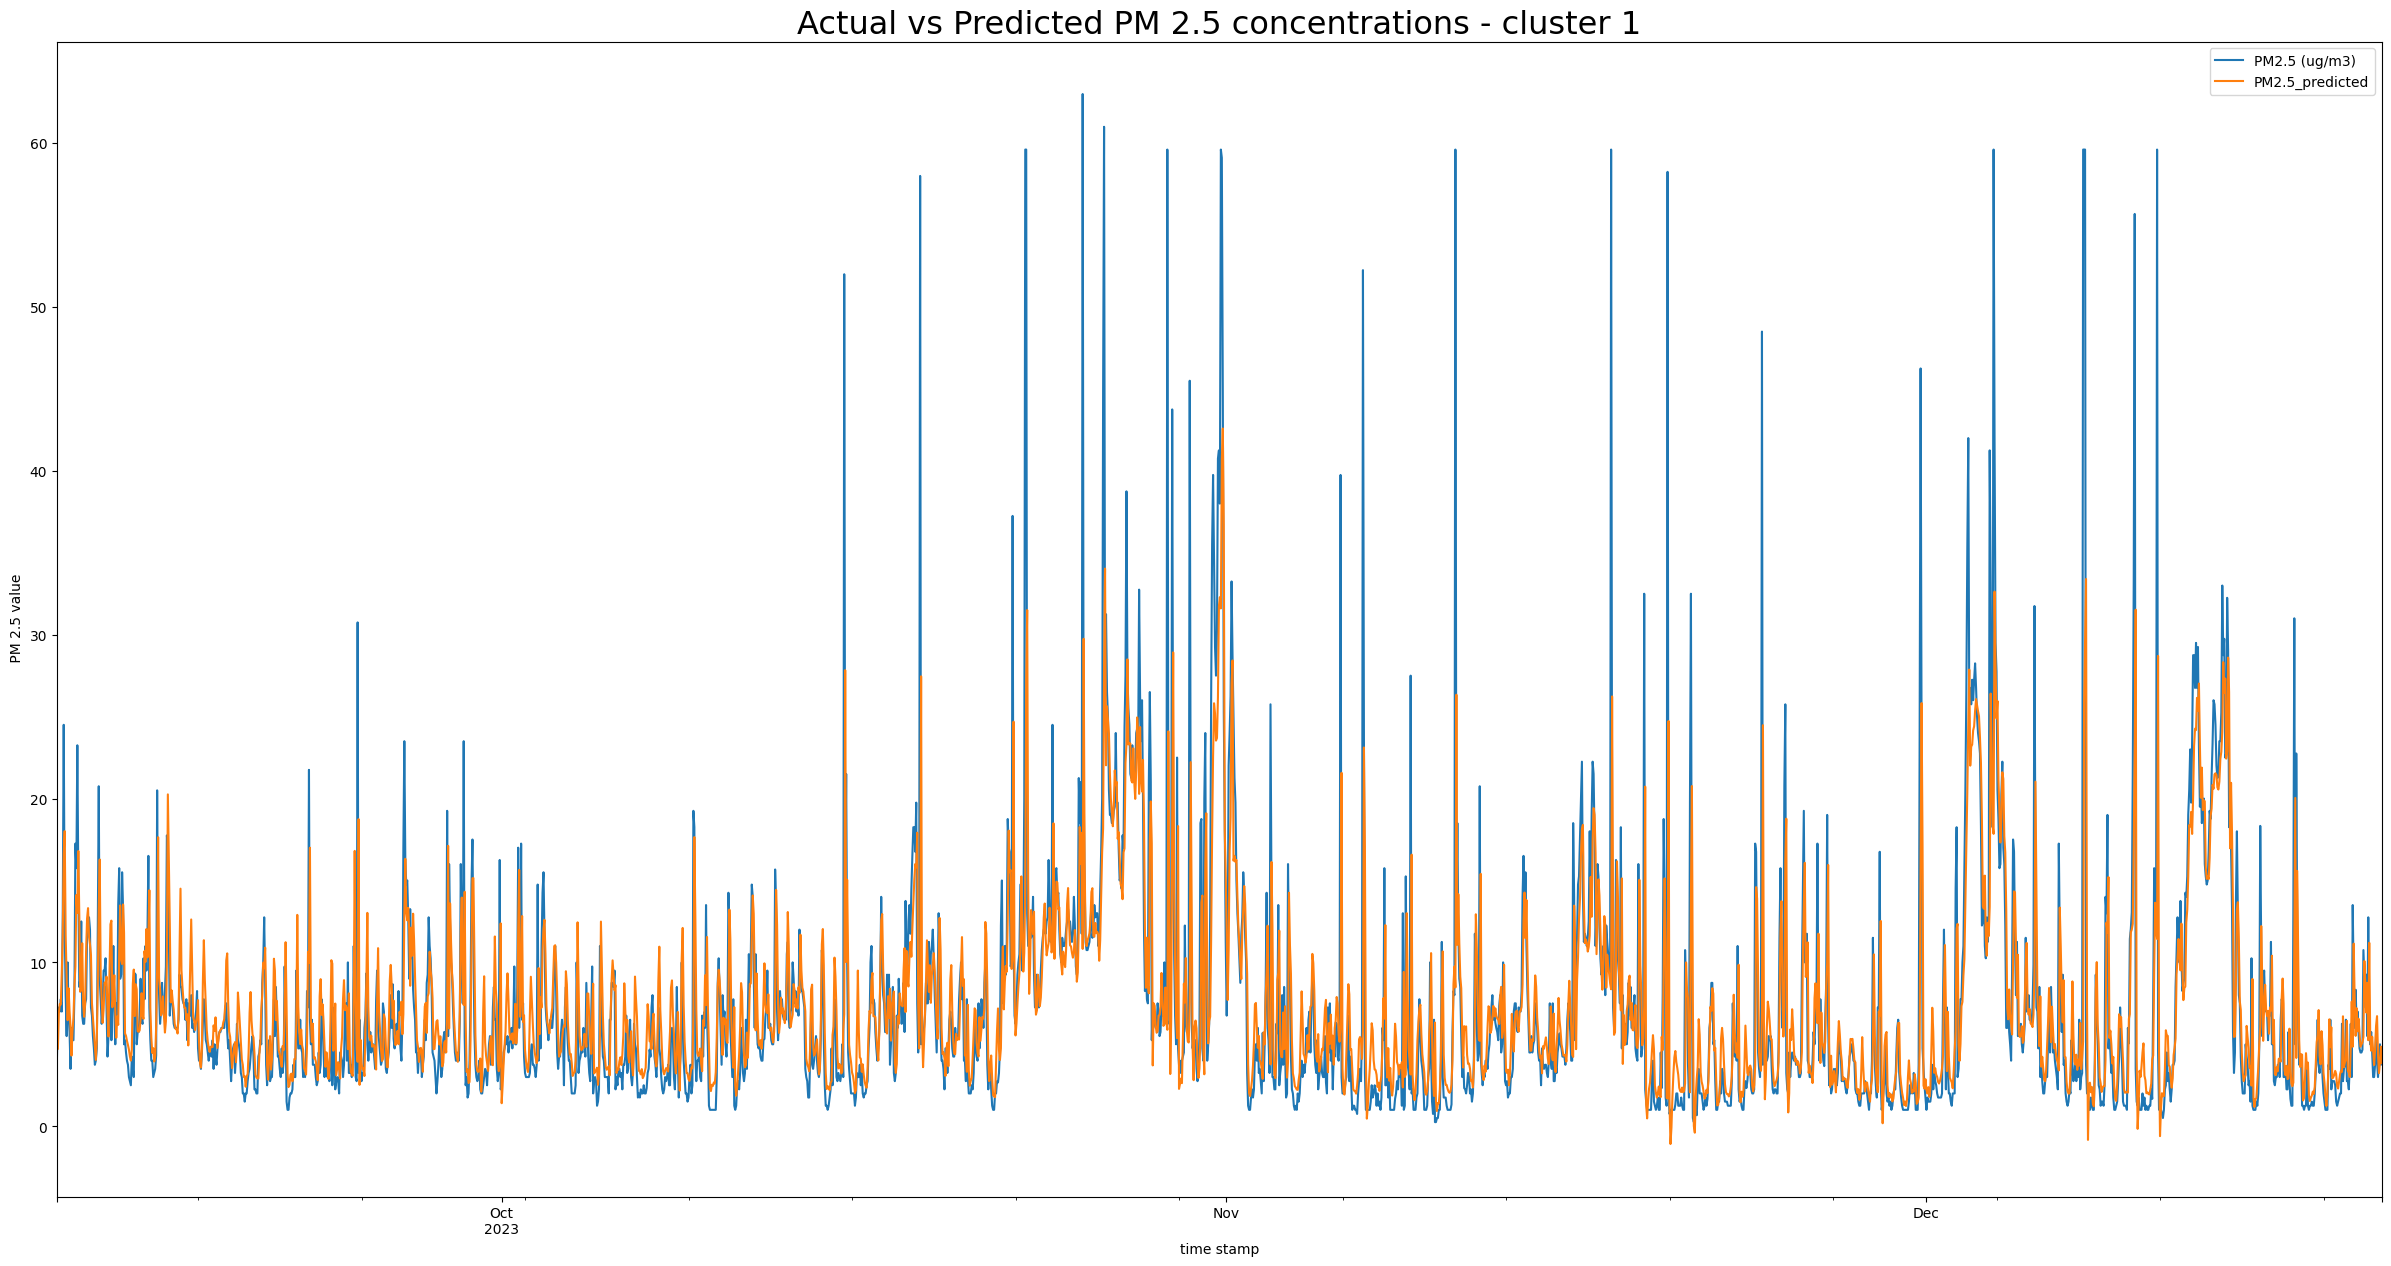

In [18]:
df_final[['PM2.5 (ug/m3)','PM2.5_predicted']].plot(figsize=(30,15))
plt.rc('axes', labelsize=23,titlesize=23)
plt.rcParams['legend.fontsize'] = 23
plt.title("Actual vs Predicted PM 2.5 concentrations - cluster 1")
plt.xlabel('time stamp')
plt.ylabel(' PM 2.5 value')
plt.savefig("/content/drive/MyDrive/FYP/plots/cluster1_forecast.pdf")
plt.show()


In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
y_test=df_final['PM2.5 (ug/m3)']
y_pred=df_final['PM2.5_predicted']
#from sklearn.metrics import mean_squared_error
#mse=mean_squared_error(df_final['PM2.5 (ug/m3)'], df_final['PM2.5_predicted'])
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) # Compute RMSE from MSE

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):",rmse)

Mean Absolute Error (MAE): 2.8203070918122095
Mean Squared Error (MSE): 33.77234176998426
Root Mean Squared Error (RMSE): 5.811397574592902


In [20]:
model.save('/content/drive/MyDrive/FYP/saved_models/cluster1_ver3.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
